## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from pandas.api.types import is_numeric_dtype

In [2]:
df = pd.read_csv("flight.csv")

In [3]:
df

,Unnamed: 0,datetime_val,dep_time,arr_time,sched_arr_time,flight,origin,dest
0,0,2013-1-1 05:40:00,2013-1-1 05:42:00,2013-1-1 09:23:00,2013-1-1 08:50:00,1141,JFK,MIA
1,1,2013-1-1 06:00:00,2013-1-1 05:54:00,2013-1-1 08:12:00,2013-1-1 08:37:00,461,LGA,ATL
2,2,2013-1-1 05:58:00,2013-1-1 05:54:00,2013-1-1 07:40:00,2013-1-1 07:28:00,1696,EWR,ORD
3,3,2013-1-1 06:00:00,2013-1-1 05:55:00,2013-1-1 09:13:00,2013-1-1 08:54:00,507,EWR,FLL
4,4,2013-1-1 06:00:00,2013-1-1 05:57:00,2013-1-1 08:38:00,2013-1-1 08:46:00,79,JFK,MCO
...,...,...,...,...,...,...,...,...
121422,123979,2013-9-30 21:37:00,2013-9-30 21:47:00,2013-9-30 00:30:00,2013-9-30 00:27:00,1371,LGA,FLL
121423,123980,2013-9-30 21:56:00,2013-9-30 21:49:00,2013-9-30 22:45:00,2013-9-30 23:08:00,523,EWR,BOS
121424,123981,2013-9-30 21:13:00,2013-9-30 22:33:00,2013-9-30 01:12:00,2013-9-30 00:30:00,471,EWR,SFO
121425,123982,2013-9-30 20:01:00,2013-9-30 22:35:00,2013-9-30 00:59:00,2013-9-30 22:49:00,1083,JFK,MCO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121427 entries, 0 to 121426
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      121427 non-null  int64 
 1   datetime_val    121427 non-null  object
 2   dep_time        121427 non-null  object
 3   arr_time        121427 non-null  object
 4   sched_arr_time  121427 non-null  object
 5   flight          121427 non-null  int64 
 6   origin          121427 non-null  object
 7   dest            121427 non-null  object
dtypes: int64(2), object(6)
memory usage: 7.4+ MB


#### Replace time value 24:00:00 to 00:00:00 (måtte gjøres fordi den kaster error)
Kanskje finnes en bedre løsning

In [5]:
df[['date','time']] = df['dep_time'].str.split(expand=True)
df['dep_time'] = (pd.to_datetime(df.pop('date'), format='%Y-%m-%d') + 
                  pd.to_timedelta(df.pop('time')))

In [6]:
df[['date','time']] = df['arr_time'].str.split(expand=True)
df['arr_time'] = (pd.to_datetime(df.pop('date'), format='%Y-%m-%d') + 
                  pd.to_timedelta(df.pop('time')))

#### Convert the columns: datetime_val, dep_time, arr_time and sched_arr_time to datetime type within the dataframe.

In [7]:
df['datetime_val'] = pd.to_datetime(df['datetime_val'])
df['dep_time'] = pd.to_datetime(df['dep_time'])
df['arr_time'] = pd.to_datetime(df['arr_time'])
df['sched_arr_time'] = pd.to_datetime(df['sched_arr_time'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121427 entries, 0 to 121426
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Unnamed: 0      121427 non-null  int64         
 1   datetime_val    121427 non-null  datetime64[ns]
 2   dep_time        121427 non-null  datetime64[ns]
 3   arr_time        121427 non-null  datetime64[ns]
 4   sched_arr_time  121427 non-null  datetime64[ns]
 5   flight          121427 non-null  int64         
 6   origin          121427 non-null  object        
 7   dest            121427 non-null  object        
dtypes: datetime64[ns](4), int64(2), object(2)
memory usage: 7.4+ MB


#### Creating new columns

In [9]:
df['air_time'] = df["sched_arr_time"]-df["dep_time"]
df['delay_time'] = df['arr_time']-df['sched_arr_time']

# Applies to the first 200 rows
Tar evighet når jeg bruker df.iterrows()

In [10]:
# if scheduled time of arrival is greater than the arrival time,  
# the plane landed early therefore, no delay, thus value set to 0
    
for i in  range(200):
    row=df.iloc[i]
    if (row['sched_arr_time'] > row['arr_time']):
        df.loc[i, 'delay_time'] = 0

In [11]:
# if scheduled time of arrival is greater than the arrival time,  
# the plane landed early therefore, no delay, thus value set to 0
# otherwise, the delay in percent is calculated

for i in range(200):
    row=df.iloc[i]
    if (row['sched_arr_time'] < row['arr_time']):
        df.loc[i, 'delay_time_percent'] = (row['delay_time'] * 100)/row['air_time']
    else:
        df.loc[i, 'delay_time_percent'] = 0

In [12]:
df.head(50)

,Unnamed: 0,datetime_val,dep_time,arr_time,sched_arr_time,flight,origin,dest,air_time,delay_time,delay_time_percent
0,0,2013-01-01 05:40:00,2013-01-01 05:42:00,2013-01-01 09:23:00,2013-01-01 08:50:00,1141,JFK,MIA,0 days 03:08:00,0 days 00:33:00,17.553191
1,1,2013-01-01 06:00:00,2013-01-01 05:54:00,2013-01-01 08:12:00,2013-01-01 08:37:00,461,LGA,ATL,0 days 02:43:00,0,0.000000
2,2,2013-01-01 05:58:00,2013-01-01 05:54:00,2013-01-01 07:40:00,2013-01-01 07:28:00,1696,EWR,ORD,0 days 01:34:00,0 days 00:12:00,12.765957
3,3,2013-01-01 06:00:00,2013-01-01 05:55:00,2013-01-01 09:13:00,2013-01-01 08:54:00,507,EWR,FLL,0 days 02:59:00,0 days 00:19:00,10.614525
4,4,2013-01-01 06:00:00,2013-01-01 05:57:00,2013-01-01 08:38:00,2013-01-01 08:46:00,79,JFK,MCO,0 days 02:49:00,0,0.000000
5,5,2013-01-01 06:00:00,2013-01-01 05:58:00,2013-01-01 07:53:00,2013-01-01 07:45:00,301,LGA,ORD,0 days 01:47:00,0 days 00:08:00,7.476636
6,6,2013-01-01 06:00:00,2013-01-01 05:58:00,2013-01-01 09:24:00,2013-01-01 09:17:00,194,JFK,LAX,0 days 03:19:00,0 days 00:07:00,3.517588
7,7,2013-01-01 06:00:00,2013-01-01 05:58:00,2013-01-01 09:23:00,2013-01-01 09:37:00,1124,EWR,SFO,0 days 03:39:00,0,0.000000
8,8,2013-01-01 05:59:00,2013-01-01 05:59:00,2013-01-01 07:02:00,2013-01-01 07:06:00,1806,JFK,BOS,0 days 01:07:00,0,0.000000
9,9,2013-01-01 06:00:00,2013-01-01 06:00:00,2013-01-01 08:51:00,2013-01-01 08:58:00,371,LGA,FLL,0 days 02:58:00,0,0.000000


#### Showing outliers in delay_time_percent column

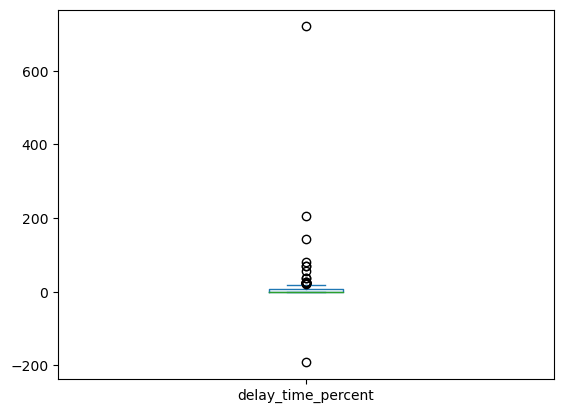

In [13]:
df["delay_time_percent"].plot.box()
plt.show()

#### Remove outliers

In [14]:
def remove_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    if is_numeric_dtype(df):
        df = df[(df > quant_df.loc[low]) & (df < quant_df.loc[high])]
    return df

In [15]:
df["delay_time_percent"] = remove_outlier(df["delay_time_percent"])

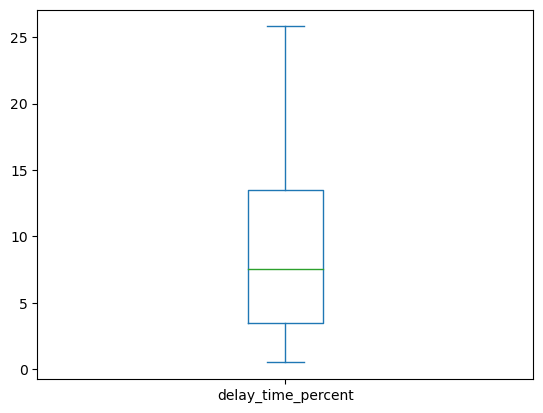

In [16]:
df["delay_time_percent"].plot.box()
plt.show()